In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot

from coffea import hist
# import userplot
import re

In [46]:
# output2_sf = load('hists_ctag_sf_ctag_AK4_med.coffea')
# output_sf=load('hists_dilep_sf_dilep_AK4.coffea')
# output2=load('hists_ctag_rawpT_ctag_AK4_small_loosepu.coffea')

# output=load('hists_ctag_rawpT_ctag_AK4_small_tightpu.coffea')
# output=load('hists_ctag_sf_ctag_AK4.coffea')
# output2=load('hists_ctag_sf_ctag_datasmall.coffea')
output=load('hists_ctag_jec_ctag_AK4_Rereco.coffea')
output2=load('hists_ctag_jec_ctag_AK4_ULJEC.coffea')
# output2=load('hists_ctag_rawpT_ctag_AK4_loosepu.coffea')
# output=load('hists_dilep_sf_dilep_AK4.coffea')
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
data2_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'tab:blue',
    'elinewidth': 1,
}
data3_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'tab:orange',
    'elinewidth': 1,
}
from cycler import cycler
colors=["#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5","#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50","#8BC34A","#CDDC39","#FFEB3B","#FFC107","#FF9800","#FF5722","#795548","#BDBDBD","#9E9E9E","#616161","#90BED4","#607D8B","#455A64"]
from xs_scaler import scale_xs
lumi = 4139
# print(output)

In [4]:
events = output['sumw']


hf= output['ljpt']
lumi=4319
hf=scale_xs(hf,lumi,eventsnotdatas=re.compile('(?!Data)')
fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)

ax=plot.plot1d(hf2[notdatas].sum("dataset").sum("flav"), ax=ax, density=True,clear=False)
# plot.plot1d(hf2["Data"].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax, error_opts=data_err_opts, clear=False)
# plot.plot1d(hf2['Data'].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax, error_opts=data2_err_opts, density=False, clear=False)
# plot.plot1d(hf['data_runD'].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax, error_opts=data_err_opts, density=False, clear=False)

# plot.plot1d(hf[notdatas].sum("dataset").sum("flav"), ax=ax,  density=False, clear=False)
plot.plot1d(hf[notdatas].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax,  density=True, clear=False)
# plot.plot1d(hf2["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False)
# plot.plot1d(hf["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data3_err_opts, clear=False)

ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['rawpT','pT'],fontsize=13)

# ax.set_xlabel(None)
# rax = plot.plotratio(
#                                 num=hf2["Data"].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 denom=hf2[notdatas].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 ax=rax,
#                                 error_opts= data2_err_opts,
#                                 denom_fill_opts={},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
# rax=plot.plotratio(
#                                 num=hf['data_runD'].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 denom=hf[notdata].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 ax=rax,
#                                 error_opts= data_err_opts,
#                                 denom_fill_opts={},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
 
# ax.set_ylim(0.1,5000000)
# ax.semilogy()
# ax.set_ylabel("Events",fontsize=15)
# rax.set_ylabel('Data/MC',fontsize=15)
rax.set_xlabel('pT',fontsize=15)
# at = AnchoredText("Shape",loc=4, prop=dict(size=18),frameon=False)
                  
# ax.add_artist(at)
rax.set_ylim(0.5,1.5)

SyntaxError: invalid syntax (<ipython-input-4-3fb833a905b4>, line 7)

In [4]:
events = output['sumw']


hf= output['pt']
lumi=4319
hf=scale_xs(hf,lumi,eventsnotdatas=re.compile('(?!Data)')
fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)

ax=plot.plot1d(hf2[notdatas].sum("dataset").sum("flav"), ax=ax, density=True,clear=False)
# plot.plot1d(hf2["Data"].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax, error_opts=data_err_opts, clear=False)
# plot.plot1d(hf2['Data'].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax, error_opts=data2_err_opts, density=False, clear=False)
# plot.plot1d(hf['data_runD'].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax, error_opts=data_err_opts, density=False, clear=False)

# plot.plot1d(hf[notdatas].sum("dataset").sum("flav"), ax=ax,  density=False, clear=False)
plot.plot1d(hf[notdatas].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax,  density=True, clear=False)
# plot.plot1d(hf2["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False)
# plot.plot1d(hf["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data3_err_opts, clear=False)

ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['rawpT','pT'],fontsize=13)

# ax.set_xlabel(None)
# rax = plot.plotratio(
#                                 num=hf2["Data"].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 denom=hf2[notdatas].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 ax=rax,
#                                 error_opts= data2_err_opts,
#                                 denom_fill_opts={},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
# rax=plot.plotratio(
#                                 num=hf['data_runD'].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 denom=hf[notdata].sum("dataset").sum("flav").sum("pt").sum("eta"),
#                                 ax=rax,
#                                 error_opts= data_err_opts,
#                                 denom_fill_opts={},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
 
# ax.set_ylim(0.1,5000000)
# ax.semilogy()
# ax.set_ylabel("Events",fontsize=15)
# rax.set_ylabel('Data/MC',fontsize=15)
rax.set_xlabel('pT',fontsize=15)
# at = AnchoredText("Shape",loc=4, prop=dict(size=18),frameon=False)
                  
# ax.add_artist(at)
rax.set_ylim(0.5,1.5)

SyntaxError: invalid syntax (<ipython-input-4-3fb833a905b4>, line 7)

<Hist (dataset,flav,deepcsv_CvB) instance at 0x7f33dc496f50>


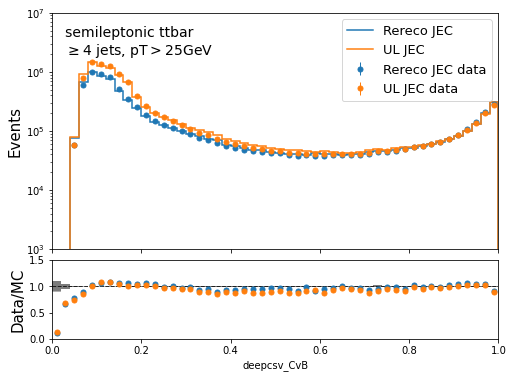

In [48]:
events = output['sumw']
lists=['deepcsv_CvB']
for var in lists:
    hf= output[var]
    hf2= output2[var]
    lumi=4319
    hf=scale_xs(hf,lumi,events)
    hf2=scale_xs(hf2,lumi,events)
    print(hf)
    notdatas=re.compile('(?!Data)')
    notdata=re.compile('(?!data_runD)')
    fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)

    ax=plot.plot1d(hf[notdatas].sum("dataset").sum("flav"),line_opts={'color':'tab:blue'},ax=ax,  density=False, clear=False)
    plot.plot1d(hf["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False)
    plot.plot1d(hf2[notdatas].sum("dataset").sum("flav"),ax=ax,  density=False, clear=False)
    plot.plot1d(hf2["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data3_err_opts, clear=False)

    # ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','pileup','l','data'],fontsize=13)
    ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['Rereco JEC','UL JEC','Rereco JEC data','UL JEC data'],fontsize=13)

    ax.set_xlabel(None)

    rax=plot.plotratio(
                                    num=hf["Data"].sum("dataset").sum("flav"),
                                    denom=hf[notdatas].sum("dataset").sum("flav"),
                                    ax=rax,
                                    error_opts= data2_err_opts,
                                    denom_fill_opts={},
                                    guide_opts={},
                                    unc='num',
                                    clear=False)
    plot.plotratio(
                                    num=hf2["Data"].sum("dataset").sum("flav"),
                                    denom=hf2[notdatas].sum("dataset").sum("flav"),
                                    ax=rax,
                                    error_opts= data3_err_opts,
                                    denom_fill_opts={},
                                    guide_opts={},
                                    unc='num',
                                    clear=False)


    ax.set_ylim(1000,10000000)
    ax.semilogy()
    at = AnchoredText(r"semileptonic ttbar"+"\n"+
                        "$\geq$4 jets, pT$>$25GeV"
                          , loc=2, prop=dict(size=14),frameon=False)
    ax.add_artist(at)
    ax.set_ylabel("Events",fontsize=15)
    rax.set_ylabel('Data/MC',fontsize=15)
    # rax.set_xlabel('sublead',fontsize=15)
    rax.set_ylim(0.0,1.5)
    fig.savefig('plot/JEC_ctag_%s.png'%(var))
    fig.savefig('plot/JEC_ctag_%s.png'%(var))

<Hist (dataset,flav,ljrawpt) instance at 0x7f33db6c06d0>


/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:428: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:440: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:475: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


(0.5, 1.5)

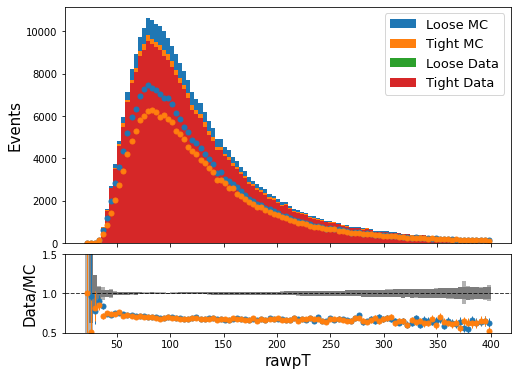

In [13]:
# print(output)
# print(output2)
events=output['sumw']
events2=output2['sumw']
hpt_L = output['ljpt']
hptraw_L = output['ljrawpt']
hpt_T = output2['ljpt']
hptraw_T = output2['ljrawpt']
# hptsf=hptsf.rebin("flav",hist.Bin("flav", "flav", [0,1,4,5,6]))
lumi=2000
hpt_L=scale_xs(hpt_L,lumi,events)   
hptraw_L=scale_xs(hptraw_L,lumi,events)
hpt_T=scale_xs(hpt_T,lumi,events2)   
hptraw_T=scale_xs(hptraw_T,lumi,events2)
print(hptraw_L)

fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
# ax=plot.plot1d(hptsf[notdata].sum("dataset"),overlay='flav',stack=True, ax=ax,  density=False, clear=False)
ax=plot.plot1d(hptraw_L[notdata].sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)

# plot.plot1d(hptraw_T[notdata].sum("dataset").sum("flav"), ax=ax,  density=False, clear=False)
# ax=plot.plot1d(hptsf[notdata].sum("dataset").sum("flav"), ax=ax,  density=False, clear=False)
# plot.plot1d(hpt["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False);
plot.plot1d(hptraw_L["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False);
plot.plot1d(hptraw_T["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data3_err_opts, clear=False);
# ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','pileup','udsg','data'])
# ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['pT','raw pT','data','data(rawpT)'],fontsize=13)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['Loose MC','Tight MC','Loose Data','Tight Data'],fontsize=13)
ax.set_xlabel(None)
rax = plot.plotratio(
                                num=hptraw_L["Data"].sum("dataset").sum("flav"),
                                denom=hptraw_L[notdata].sum("dataset").sum("flav"),
                                ax=rax,
                                error_opts= {'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:blue',  'elinewidth': 1},
                                denom_fill_opts={},
                                guide_opts={},
                                unc='num',
                                clear=False)
                            
plot.plotratio(
                                num=hptraw_T["Data"].sum("dataset").sum("flav"),
                                denom=hptraw_T[notdata].sum("dataset").sum("flav"),
                                ax=rax,
                                denom_fill_opts={},
                                error_opts={'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:orange',  'elinewidth': 1},
#                                 error_opts={'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:orange',  'elinewidth': 1},
#                                 denom_fill_opts={'color':'tab:brown','hatch':'+'},
                                guide_opts={},
                                unc='num',
                                clear=False)
                            
# ax.set_ylim(0.1,5000000)
# ax.semilogy()
ax.set_ylabel("Events",fontsize=15)
rax.set_ylabel('Data/MC',fontsize=15)
rax.set_xlabel('rawpT',fontsize=15)
rax.set_ylim(0.5,1.5)
# at = AnchoredText(r"semileptonic ttbar"+
#                   "\n"+"inclusive pT, $\eta$",loc=2, prop=dict(size=18),frameon=False)
# at = AnchoredText(r"dilepton ttbar"+
                  
# ax.add_artist(at)
# fig.savefig("plot/ctag_lj_rawpT_rawptvspt_inclusive.pdf")

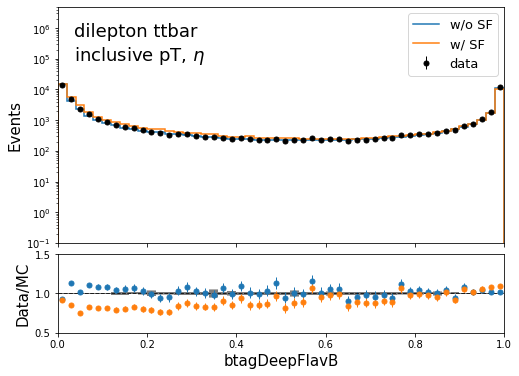

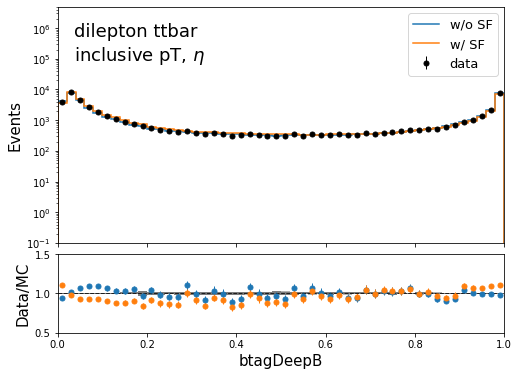

In [15]:
events = output['sumw']
# events2 = output2['sumw']
# print(output)
etabin=[-2.5,-2.0,-1.5,-0.5,0.,0.5,1.5,2.0,2.5]
ptbin = [20+3.8*2,20+3.8*5,20+3.8*10,20+3.8*15,20+3.8*20,20+3.8*25,20+3.8*30,20+3.8*40,20+3.8*60,20+3.8*100]
# ptbin=[20,40,60,80,100,150,200,300,400]
# discr_list=["btagDeepFlavB","btagDeepFlavC","btagDeepB","btagDeepC"]
discr_list=["btagDeepFlavB","btagDeepB"]
#discriminator bins
for discr in discr_list:
    
    
    hflav = output[discr]
    hflavsf = output["%sSF" %discr]
#     hflavsf = output2[discr]
    hflav=scale_xs(hflav,lumi,events)   
    hflavsf=scale_xs(hflavsf,lumi,events)   
# #     print(hflav,hflavsf)
    fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
#     hflav_pt=(hflav.rebin("pt", hist.Bin("ptwide", "rebinned pt", [20+3.8*2,20+3.8*5,20+3.8*10,20+3.8*15,20+3.8*20,20+3.8*25,20+3.8*30,20+3.8*40,20+3.8*60,20+3.8*100])))
#     hflavsf_pt=(hflavsf.rebin("pt", hist.Bin("ptwide", "rebinned pt", [20+3.8*2,20+3.8*5,20+3.8*10,20+3.8*15,20+3.8*20,20+3.8*25,20+3.8*30,20+3.8*40,20+3.8*60,20+3.8*100])))
    ax=plot.plot1d(hflav[notdata].sum("dataset",sumw2=True).sum("eta").sum("flav").sum("pt"), ax=ax,  density=False, clear=False)
    plot.plot1d(hflavsf[notdata].sum("dataset",sumw2=True).sum("eta").sum("flav").sum("pt"), ax=ax,  density=False, clear=False)
#     ax=plot.plot1d(hflav[notdata].sum("dataset",sumw2=True).sum("flav"), ax=ax,  density=False, clear=False)

#     plot.plot1d(hflavsf[notdata].sum("dataset").sum("flav"), ax=ax,  density=False, clear=False)
#     plot.plot1d(hflavsf[notdata].sum("dataset").sum("eta").sum("flav").sum("pt"), ax=ax,  density=False, clear=False)
    plot.plot1d(hflav["Data"].sum("dataset").sum("eta").sum("flav").sum("pt"),ax=ax,  density=False, error_opts=data_err_opts, clear=False);
#     ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['w/o SF','w/ SF','data'],fontsize=16)
#     plot.plot1d(hflavsf[notdata].sum("dataset").sum("flav"), ax=ax,  density=False, clear=False)
#     plot.plot1d(hflav["Data"].sum("dataset").sum("eta").sum("flav").sum("pt"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False);
#     plot.plot1d(hflav["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data2_err_opts, clear=False);
#     plot.plot1d(hflavsf["Data"].sum("dataset").sum("flav"),ax=ax,  density=False, error_opts=data3_err_opts, clear=False);
#     ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['pT','raw pT','data','data(rawpT)'],fontsize=13)
    ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['w/o SF','w/ SF','data'],fontsize=13)
    
    ax.set_xlabel(None)
    rax = plot.plotratio(
                                num=hflav["Data"].sum("dataset").sum("flav").sum("eta").sum("pt"),
                                denom=hflav[notdata].sum("dataset").sum("flav").sum("eta").sum("pt"),
                                ax=rax,
                                error_opts= {'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:blue',  'elinewidth': 1},
                                denom_fill_opts={},
                                guide_opts={},
                                unc='num',
                                clear=False)
                            
    plot.plotratio(
                                num=hflavsf["Data"].sum("dataset").sum("flav").sum("eta").sum("pt"),
                                denom=hflavsf[notdata].sum("dataset").sum("flav").sum("eta").sum("pt"),
#                                 num=hflavsf["Data"].sum("dataset").sum("flav"),
#                                 denom=hflavsf[notdata].sum("dataset").sum("flav"),
                                ax=rax,
                                error_opts={'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:orange',  'elinewidth': 1},
#                                 denom_fill_opts={'color':'tab:brown','hatch':'+'},
                                denom_fill_opts={},
                                guide_opts={},
                                unc='num',
                                clear=False)
                            
    ax.set_ylim(0.1,5000000)
    ax.semilogy()
    ax.set_ylabel("Events",fontsize=15)
    rax.set_ylabel('Data/MC',fontsize=15)
    rax.set_xlabel(discr,fontsize=15)
    rax.set_ylim(0.5,1.5)
#     at = AnchoredText(r"semileptonic ttbar"+"\n"+
    at = AnchoredText(r"dilepton ttbar"+"\n"+
                          "inclusive pT, $\eta$"
                          , loc=2, prop=dict(size=18),frameon=False)
    ax.add_artist(at)
#     fig.savefig("plot/ctag_rawpT_%s_inclusive.pdf" %(discr))
#     fig.savefig("plot/ctag_%s_inclusive.pdf" %(discr))
#     for i in range(len(ptbin)-1):    
#         fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
#         fig.subplots_adjust(hspace=.07)
#         hflav_pt=(hflav.rebin("pt", hist.Bin("ptwide", "rebinned pt", ptbin)))
#         hflavsf_pt=(hflavsf.rebin("pt", hist.Bin("ptwide", "rebinned pt", ptbin)))
#         ax=plot.plot1d(hflav_pt[notdata].sum("dataset").sum("eta").sum("flav").integrate("ptwide",slice(ptbin[i],ptbin[i+1])), ax=ax,  density=False, clear=False)
#         plot.plot1d(hflavsf_pt[notdata].sum("dataset").sum("eta").sum("flav").integrate("ptwide",slice(ptbin[i],ptbin[i+1])), ax=ax,  density=False, clear=False)
#         plot.plot1d(hflav_pt["Data"].sum("dataset").sum("eta").sum("flav").integrate("ptwide",slice(ptbin[i],ptbin[i+1])),ax=ax,  density=False, error_opts=data_err_opts, clear=False);
#         ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['w/o SF','w/ SF','data'],fontsize=16)
#         ax.set_xlabel(None)
#         rax = plot.plotratio(
#                                 num=hflav_pt["Data"].sum("dataset").sum("flav").sum("eta").integrate("ptwide",slice(ptbin[i],ptbin[i+1])),
#                                 denom=hflav_pt[notdata].sum("dataset").sum("flav").sum("eta").integrate("ptwide",slice(ptbin[i],ptbin[i+1])),
#                                 ax=rax,
#                                 error_opts= {'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:blue',  'elinewidth': 1},
                                
#         #                         guide_opts={},
#                                 unc='num',
#                                 clear=False)
                            
#         plot.plotratio(
#                                 num=hflavsf_pt["Data"].sum("dataset").sum("flav").sum("eta").integrate("ptwide",slice(ptbin[i],ptbin[i+1])),
#                                 denom=hflavsf_pt[notdata].sum("dataset").sum("flav").sum("eta").integrate("ptwide",slice(ptbin[i],ptbin[i+1])),
#                                 ax=rax,
#                                 error_opts={'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:orange',  'elinewidth': 1},
# #                                 denom_fill_opts={'color':'tab:brown','hatch':'+'},
#                                 denom_fill_opts={'color':'tab:gray'},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
                            
#         ax.set_ylim(0.1,5000000)
#         ax.semilogy()
#         rax.set_ylabel('Data/MC')
#         rax.set_ylim(0.5,1.5)
        
#         ax.set_ylabel("Events",fontsize=15)
#         rax.set_ylabel('Data/MC',fontsize=15)
#         rax.set_xlabel(discr,fontsize=18)
#         at = AnchoredText(r"dilepton ttbar"+"\n"+
# #         at = AnchoredText(r"semileptonic ttbar"+"\n"+
#                           "%.1f$<pT<$%.1f"%(ptbin[i],ptbin[i+1])
#                           , loc=2, frameon=False,prop=dict(size=13))
#         ax.add_artist(at)
        
# #         fig.savefig("plot/ctag_%s_pt%.1f_%.1f.pdf" %(discr,ptbin[i],ptbin[i+1]))
#         fig.savefig("plot/dilep_%s_pt%.1f_%.1f.pdf" %(discr,ptbin[i],ptbin[i+1]))

#     #loop etabins
#     for i in range(len(etabin)-1):   
#         fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
#         fig.subplots_adjust(hspace=.07)
#         hflav_eta=(hflav.rebin("eta", hist.Bin("etawide", "rebinned eta", [-2.5,-2.0,-1.5,-0.5,0.,0.5,1.5,2.0,2.5])))
#         hflavsf_eta=(hflavsf.rebin("eta", hist.Bin("etawide", "rebinned eta", [-2.5,-2.0,-1.5,-0.5,0.,0.5,1.5,2.0,2.5])))
#         ax=plot.plot1d(hflav_eta[notdata].sum("dataset").sum("pt").sum("flav").integrate("etawide",slice(etabin[i],etabin[i+1])), ax=ax,  density=False, clear=False)
#         plot.plot1d(hflavsf_eta[notdata].sum("dataset").sum("pt").sum("flav").integrate("etawide",slice(etabin[i],etabin[i+1])), ax=ax,  density=False, clear=False)
#         plot.plot1d(hflav_eta["Data"].sum("dataset").sum("pt").sum("flav").integrate("etawide",slice(etabin[i],etabin[i+1])),ax=ax,  density=False, error_opts=data_err_opts, clear=False);
#         ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['w/o SF','w/ SF','data'],fontsize=16)
#         ax.set_xlabel(None)
#         rax = plot.plotratio(
#                                 num=hflav_eta["Data"].sum("dataset").sum("flav").sum("pt").integrate("etawide",slice(etabin[i],etabin[i+1])),
#                                 denom=hflav_eta[notdata].sum("dataset").sum("flav").sum("pt").integrate("etawide",slice(etabin[i],etabin[i+1])),
#                                 ax=rax,
#                                 error_opts= {'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:blue',  'elinewidth': 1},
#                                 denom_fill_opts={},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
                            
#         plot.plotratio(
#                                 num=hflavsf_eta["Data"].sum("dataset").sum("flav").sum("pt").integrate("etawide",slice(etabin[i],etabin[i+1])),
#                                 denom=hflavsf_eta[notdata].sum("dataset").sum("flav").sum("pt").integrate("etawide",slice(etabin[i],etabin[i+1])),
#                                 ax=rax,
#                                 error_opts={'linestyle': 'none','marker': '.', 'markersize': 10.,'color': 'tab:orange',  'elinewidth': 1},
# #                                 denom_fill_opts={'color':'tab:brown','hatch':'+'},
#                                 guide_opts={},
#                                 unc='num',
#                                 clear=False)
                            
#         ax.set_ylim(0.1,5000000)
#         ax.semilogy()
#         rax.set_ylim(0.5,1.5)
#         rax.set_ylabel('Data/MC')
#         at = AnchoredText(r"dilepton ttbar"+"\n"+
# #         at = AnchoredText(r"semileptonic ttbar"+"\n"+
#                           "%.1f$<\eta<$%.1f"%(etabin[i],etabin[i+1])
#                           , loc=2, prop=dict(size=18),frameon=False)
#         ax.add_artist(at)
#         ax.set_ylabel("Events",fontsize=15)
#         rax.set_ylabel('Data/MC',fontsize=15)
#         rax.set_xlabel(discr,fontsize=15)
# #         fig.savefig("plot/ctag_%s_eta%.1f_%.1f.pdf" %(discr,etabin[i],etabin[i+1]))
#         fig.savefig("plot/dilep_%s_eta%.1f_%.1f.pdf" %(discr,etabin[i],etabin[i+1]))


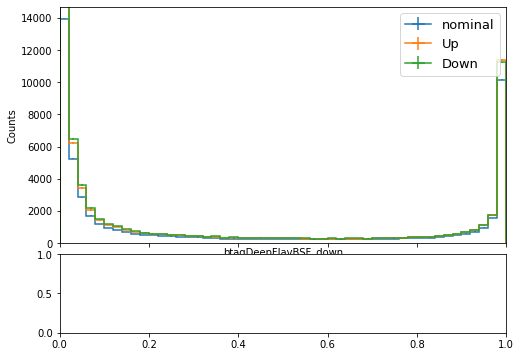

In [9]:
events = output['sumw']
hflav = output['btagDeepFlavBSF']
hflav_up = output['btagDeepFlavBSF_up']
hflav_dn = output['btagDeepFlavBSF_down']
hflav=scale_xs(hflav,lumi,events)   
hflav_up=scale_xs(hflav_up,lumi,events)   
hflav_dn=scale_xs(hflav_dn,lumi,events)   
fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax = plot.plot1d(hflav[notdata].sum("dataset").sum("eta").sum("flav").sum("pt"),ax=ax,  density=False,  clear=False)

plot.plot1d(hflav_up[notdata].sum("dataset").sum("eta").sum("flav").sum("pt"),ax=ax,  density=False,  clear=False)

plot.plot1d(hflav_dn[notdata].sum("dataset").sum("eta").sum("flav").sum("pt"),ax=ax,  density=False,  clear=False)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['nominal','Up','Down'],fontsize=13)

# err_up=hflav_up[notdata].integrate("dataset").integrate("flav").integrate("pt").integrate("eta").values()[()]
# err_dn=hflav_dn[notdata].integrate("dataset").integrate("flav").integrate("pt").integrate("eta").values()[()]
# nom=hflav[notdata].integrate("dataset").integrate("flav").integrate("pt").integrate("eta").values()[()]
# print(type(nom))
# ax=plot.plot1d(hflav[notdata].sum("dataset",sumw2=True).sum("flav").sum("pt").sum("eta"), ax=ax,  density=False, clear=False,error_opts={'linestyle': 'none',
#     'marker': '.',
#     'markersize': 10.,
#     'color': 'k',
#     'elinewidth': 1,
#     'yerr':[err_up,err_dn],
#     'histtype':'errorbar'                                                                                                                                   
#      })
# plot.plot1d(hflav[notdata].sum("dataset",sumw2=True).sum("flav").sum("pt").sum("eta"), ax=ax,  density=False, clear=False,error_opts={'linestyle': 'none',
#     'marker': '.',
#     'markersize': 10.,
#     'color': 'k',
#     'elinewidth': 1})
# plot.plot1d(hflav["Data"].sum("dataset").sum("eta").sum("flav").sum("pt"),ax=ax,  density=False, error_opts=data_err_opts, clear=False);
# print(hflav_up[notdata].integrate("dataset").integrate("flav").integrate("pt").integrate("eta").value()[()])
# plot.plot1d(hflav_up[notdata].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax,  density=False, clear=False)
# plot.plot1d(hflav_dn[notdata].sum("dataset").sum("flav").sum("pt").sum("eta"), ax=ax,  density=False, clear=False)


print(output)

NameError: name 'output2' is not defined

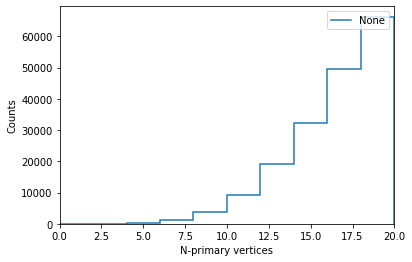

In [10]:
# events2=output2['sumw']
# # hpt=output2['pt']
# # heta=output2['eta']
# print(output2)
# hjec=output2['rawfactor']
# print(hjec)
hpv=output['DeepCSV_jetNSelectedTracks']
# hjec=scale_xs(hjec,lumi,events2)
# ax = plot.plot2d(hpv["data_runF"].sum('dataset','flav'),xaxis='npv')
# ax = plot.plot2d(hpv["data_runB"].sum('dataset','flav'),xaxis='npv')
ax = plot.plot1d(hpv["data_runB"].sum('dataset','flav','DeepCSV_jetNSelectedTracks'))
# ax = plt.axes(projection='3d')
# ax.plot_surface(hdata_pt, hdata_eta, hdata_jec, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# print(hjec['rawfactor'].sum('eta').sum('flav').sum(p).dim())
# ax= plot.plot2d(hjec['Data'].sum('eta','dataset').integrate("flav",0,1),xaxis='pt')
# ax.set_ylim(0,2)
# ax =plot.plot2d(hjec['Data'].sum('pt','flav','dataset'),xaxis='eta')
# ax.set_ylim(0,2)
# ax=plot.plot2d(hjec[notdata].sum('eta','flav','dataset'),xaxis='pt')
# ax.set_ylim(0,2)
# ax=plot.plot2d(hjec[notdata].sum('pt','flav','dataset'),xaxis='eta')
# ax.set_ylim(0,2)
# ax=plot.plot1d(hjec[notdata].sum('pt').sum('dataset').sum('eta').integrate("flav",0,1))


KeyError: ()

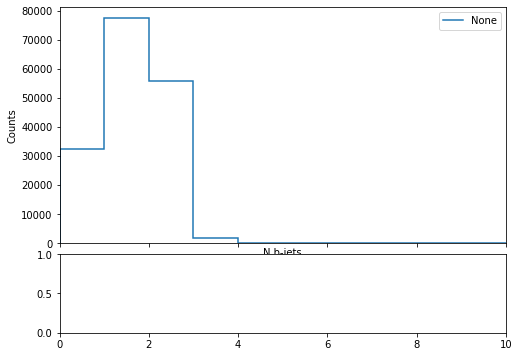

In [4]:
events = output['sumw']
hnjet=output['nbjet']
hnjet=scale_xs(hnjet,lumi,events)   
fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax=plot.plot1d(hnjet[notdata].sum("dataset"), ax=ax,  density=False, clear=False)
plot.plot1d(hnjet["Data"].sum("dataset"),ax=ax,  density=False, error_opts=data_err_opts, clear=False);
# ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['pT','raw pT','data','data(rawpT)'],fontsize=13)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['MC','data'],fontsize=13)

ax.set_xlabel(None)
rax = plot.plotratio(
                                num=hnjet["Data"].sum("dataset"),
                                denom=hnjet[notdata].sum("dataset"),
                                ax=rax,
                                error_opts= data_err_opts,
                                denom_fill_opts={},
                                guide_opts={},
                                unc='num',
                                clear=False)
                            

# ax.set_ylim(0,10000)
# ax.semilogy()
ax.set_ylabel("Events",fontsize=15)
rax.set_ylabel('Data/MC',fontsize=15)
rax.set_xlabel('Jet multiplicity',fontsize=15)
rax.set_ylim(0.5,1.5)
# at = AnchoredText(r"semileptonic ttbar"+"\n"+
at = AnchoredText(r"dilepton ttbar"+"\n"+
                  "inclusive pT, $\eta$",loc=4, prop=dict(size=18),frameon=False)
ax.add_artist(at)
# fig.savefig("plot/dilep_rawpT_rawptvspt_inclusive.pdf")

/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:428: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:440: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:475: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


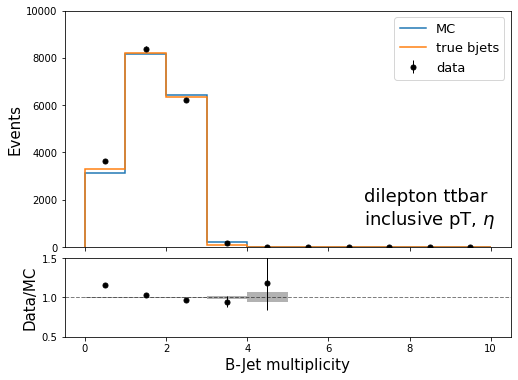

In [13]:
events = output['sumw']
hnbjet=output['nbjet']
# hnbjet=scale_xs(hnbjet,lumi,events)  
hntbjet=output['ntbjet']
# hntbjet=scale_xs(hntbjet,lumi,events)  
fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax=plot.plot1d(hnbjet[notdata].sum("dataset"), ax=ax,  density=False, clear=False)

plot.plot1d(hntbjet[notdata].sum("dataset"), ax=ax,  density=False, clear=False)
plot.plot1d(hnbjet["Data"].sum("dataset"),ax=ax,  density=False, error_opts=data_err_opts, clear=False);
# ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['pT','raw pT','data','data(rawpT)'],fontsize=13)
ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['MC','true bjets','data'],fontsize=13)

ax.set_xlabel(None)
rax = plot.plotratio(
                                num=hnbjet["Data"].sum("dataset"),
                                denom=hnbjet[notdata].sum("dataset"),
                                ax=rax,
                                error_opts= data_err_opts,
                                denom_fill_opts={},
                                guide_opts={},
                                unc='num',
                                clear=False)
                            

ax.set_ylim(0,10000)
# ax.semilogy()
ax.set_ylabel("Events",fontsize=15)
rax.set_ylabel('Data/MC',fontsize=15)
rax.set_xlabel('B-Jet multiplicity',fontsize=15)
rax.set_ylim(0.5,1.5)
at = AnchoredText(r"dilepton ttbar"+"\n"+
# at = AnchoredText(r"dilepton ttbar"+"\n"+
                  "inclusive pT, $\eta$",loc=4, prop=dict(size=18),frameon=False)
ax.add_artist(at)
# fig.savefig("plot/dilep_rawpT_rawptvspt_inclusive.pdf")

/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:428: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:440: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:475: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:428: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/desy.de/user/m/milee/miniconda3/envs/coffea/lib/python3.7/site-packages/coffea/hist/plot.py:440: RuntimeWarning: invalid value encountered in true_divide
  poisson

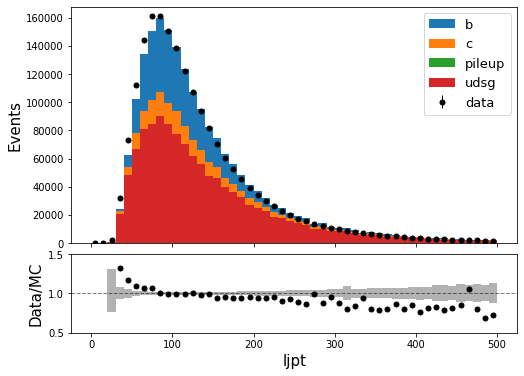

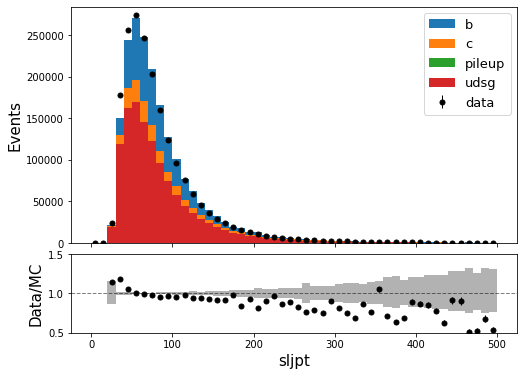

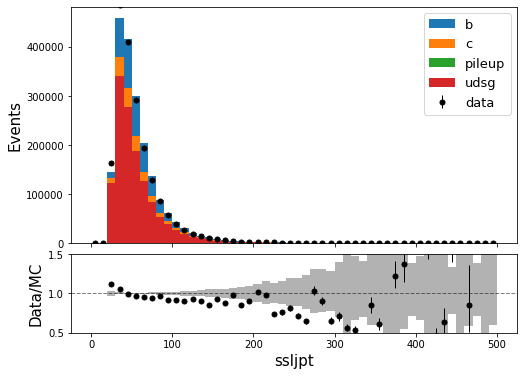

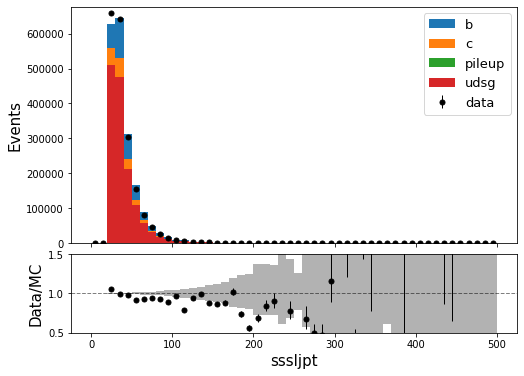

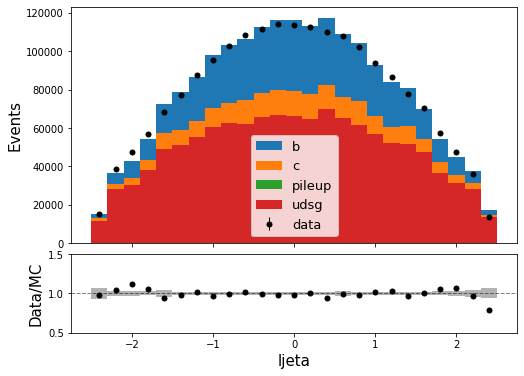

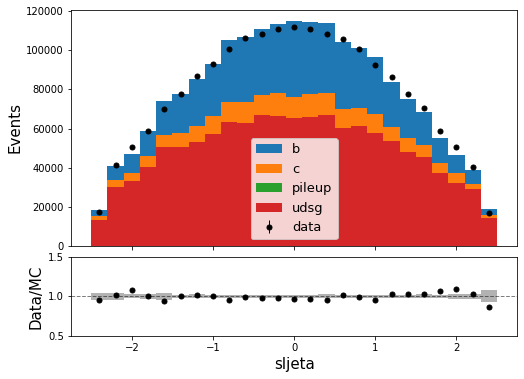

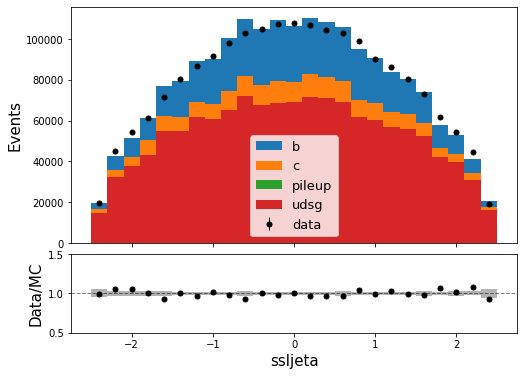

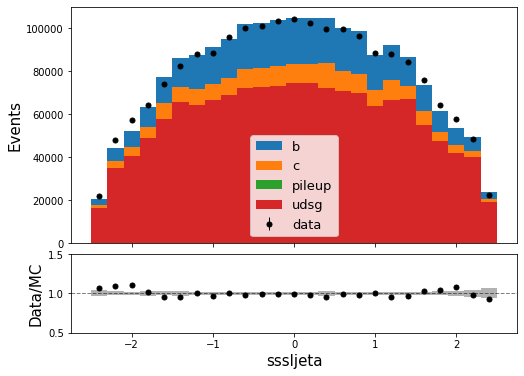

In [54]:
events = output['sumw']
# ptetas=['ljpt','sljpt','ssljpt','sssljpt','ljeta','sljeta','ssljeta','sssljeta']
ptetas=['ljpt','sljpt','ljeta','sljeta']
datas=re.compile('(?=data)')
for name in ptetas:
    hlj=output[name]
    hlj=scale_xs(hlj,41500,events)   
    fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    ax=plot.plot1d(hlj[notdata].sum("dataset"),overlay="flav", ax=ax,  density=False, clear=False,stack=True)
    plot.plot1d(hlj[datas].sum("dataset").sum("flav"),error_opts=data_err_opts,ax=ax,density=False,clear=False)
    ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['b','c','pileup','udsg','data'],fontsize=13)

    rax=plot.plotratio(
                                        num=hlj[datas].sum("dataset").sum("flav"),
                                        denom=hlj[notdata].sum("dataset").sum("flav"),
                                        ax=rax,
                                        error_opts= data_err_opts,
#                                         denom_fill_opts={'yerr':[ratio_up,ratio_dn]},
                                        denom_fill_opts={},
                                        guide_opts={},
                                        unc='num',
                                        clear=False)

    ax.set_ylabel("Events",fontsize=15)
    rax.set_ylabel('Data/MC',fontsize=15)
    ax.set_xlabel(None)
    rax.set_xlabel(name,fontsize=15)
    rax.set_ylim(0.5,1.5)
    fig.savefig("plot/%s_dilep.pdf"%(name))